In [ ]:
%pip install numpy tensorflow

In [3]:
import pandas as pd

In [ ]:
%pip install nltk
%pip install seaborn

In [ ]:
%pip install scikit-learn

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords, wordnet
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from nltk import pos_tag
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [4]:
df = pd.read_csv("movie_reviews.csv")

# Vorverarbeitung der Texten

In [5]:
tokenizer = nltk.ToktokTokenizer()

#Englische stopwords
nltk.download('stopwords')
stopword_list=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
#Funktion zur Tokenisierung des Textes und Entfernung von Stoppwörtern
def tokenize(text):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]

    return filtered_tokens

In [7]:
#Wende die Funktion auf die Spalte "comment" an
df['comment']=df['comment'].apply(tokenize)

In [8]:
print(df.comment.loc[0:1])

0    [original, 1982, theatrical, showing, Beta, vi...
1    [really, believe, one, great, crime, movies, t...
Name: comment, dtype: object


In [9]:
# Lemmatisierung
# Download der erforderlichen Datensätze
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng') # Für POS tagging

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [10]:
lemmatizer = WordNetLemmatizer()
# Zuordnung von POS (Part-of-Speech)-Tags von NLTK zu WordNet
# Die Zuordnung von POS-Tags verbessert die Genauigkeit, indem sie sicherstellt, dass die Wörter korrekt lemmatisiert werden.
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatize(text):
    pos_tags = pos_tag(text)
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
    new_text = ' '.join(lemmatized_words)
    return new_text

df['comment']=df['comment'].apply(lambda text: lemmatize(text))



In [11]:
print(df['comment'])

0       original 1982 theatrical show Beta videotape ,...
1       really believe one great crime movie time. dra...
2       ' say well , stole text : Shallow romance , sh...
3            final scene enough get excite 10th movie : )
4       Megan Fox ..... joke. fluff brains. Totally un...
                              ...                        
1346    earth consider one best ? anyone explain myste...
1347    rate movie look alone?It might look authentic ...
1348    go film think would carry first 2 goal film st...
1349    Context : atheist , one evangelical Christians...
1350    ' listen critic say movie boring. movie one te...
Name: comment, Length: 1351, dtype: object


In [12]:
import re
# Entferne Sonderzeichen, Jahre
def remove_things(text):
    # Remove punctuation
    text = re.sub(r"[^\w\s]", "", text)

    # Remove years
    text = re.sub(r"\b\d{4}\b", "", text)

    # Remove special characters
    text=re.sub(r'[^a-zA-z0-9\s]','',text)
    return text


df['comment']=df['comment'].apply(remove_things)

In [13]:
df.comment.loc[0:0]

,comment
0,original theatrical show Beta videotape stan...


Term Frequency-Inverse Document Frequency model (TF-IDF)

Es wird verwendet, um Textdokumente in eine Matrix von tf-idf-Merkmalen umzuwandeln.

In [76]:
#Tfidf vectorizer

def tfidf_vectorize(text, tfidf = None):
    if tfidf is None:
        tfidf=TfidfVectorizer(min_df=0.0,max_df=1.0,use_idf=True,ngram_range=(1,3), max_features=100000)
        tfidf.fit(df.comment)

    new_text = tfidf.transform(text)
    print(f"Vocabulary size: {len(tfidf.get_feature_names_out())}")

    return new_text, tfidf


In [77]:
text_count_matrix, fitted_tfidf = tfidf_vectorize(df.comment)

Vocabulary size: 100000


In [88]:
print(text_count_matrix)

  (0, 104)	0.03098582439344502
  (0, 106)	0.03637954115285202
  (0, 343)	0.012313631538989612
  (0, 435)	0.014504811681570117
  (0, 623)	0.023970816902517823
  (0, 648)	0.02807172861243725
  (0, 773)	0.027043386735073654
  (0, 834)	0.03637954115285202
  (0, 917)	0.02437596329494794
  (0, 918)	0.03637954115285202
  (0, 929)	0.025461524887869343
  (0, 983)	0.032683775835362715
  (0, 1013)	0.016482633549108134
  (0, 1154)	0.030521891713165654
  (0, 1187)	0.034217657030654956
  (0, 1237)	0.03637954115285202
  (0, 1362)	0.02270358438308628
  (0, 1363)	0.034217657030654956
  (0, 1825)	0.03580142913081102
  (0, 1877)	0.022602022030518396
  (0, 1932)	0.013341545749064635
  (0, 2149)	0.25817114113015976
  (0, 2150)	0.2639934970057558
  (0, 2151)	0.08015061294068264
  (0, 2152)	0.03791342234814426
  :	:
  (1350, 10472)	0.13781102941985515
  (1350, 10473)	0.18688877932464232
  (1350, 23230)	0.14753594468010936
  (1350, 23675)	0.17156044750625504
  (1350, 23681)	0.20587464464806401
  (1350, 25640)

In [87]:
X =text_count_matrix
y = df.sentiment

In [89]:
#Training- und Testdaten splitten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

## Neuronales Netz

In [ ]:
%pip install tensorflow==2.12

In [20]:
import numpy as np
import tensorflow as tf
import keras
from keras import models

In [21]:
from keras.utils import to_categorical
from keras.layers import Dense, Dropout

In [90]:
X_train_dense = X_train.toarray()
#One hot encoding für die Label
y_train_onehot = to_categorical(y_train)

In [91]:
X_test_dense = X_train.toarray()
y_test_onehot = to_categorical(y_train)

In [92]:
#Training und Validationsdaten splitten
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_dense, y_train_onehot, test_size=0.15, random_state=42, stratify=y_train_onehot
)

In [104]:
seq_model = keras.Sequential()
#Input layer
seq_model.add(Dense(128, activation='tanh', input_shape=(X_train_dense.shape[1],)))
seq_model.add(Dropout(0.2))
seq_model.add(Dense(64, activation='tanh'))
seq_model.add(Dropout(0.3))
seq_model.add(Dense(32, activation='tanh'))
seq_model.add(Dropout(0.4))
#Output layer
seq_model.add(Dense(3, activation='softmax')) # <-- Aktivierungsfuktion für Multi-Label Klassifiation


seq_model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics = ['accuracy'])

In [105]:
# definiere batch size und epochs
# training und validation loss darstellen

history = seq_model.fit(X_train_final, y_train_final,
validation_data = (X_val, y_val),
epochs= 10,
batch_size = 32)

Epoch 1/10
26/26 [==============================] - 9s 263ms/step - loss: 1.0699 - accuracy: 0.4209 - val_loss: 0.9987 - val_accuracy: 0.6338
Epoch 2/10
26/26 [==============================] - 8s 316ms/step - loss: 0.4856 - accuracy: 0.9328 - val_loss: 0.7423 - val_accuracy: 0.7535
Epoch 3/10
26/26 [==============================] - 6s 237ms/step - loss: 0.0790 - accuracy: 0.9988 - val_loss: 0.6567 - val_accuracy: 0.7183
Epoch 4/10
26/26 [==============================] - 8s 300ms/step - loss: 0.0145 - accuracy: 1.0000 - val_loss: 0.6236 - val_accuracy: 0.7606
Epoch 5/10
26/26 [==============================] - 6s 237ms/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 0.6138 - val_accuracy: 0.7535
Epoch 6/10
26/26 [==============================] - 8s 302ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.6114 - val_accuracy: 0.7465
Epoch 7/10
26/26 [==============================] - 7s 249ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.6133 - val_accuracy: 0.7465
Epoch 

In [106]:
#Bewertung des Modells
scores = seq_model.evaluate(X_test_dense, y_test_onehot, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 96.30%


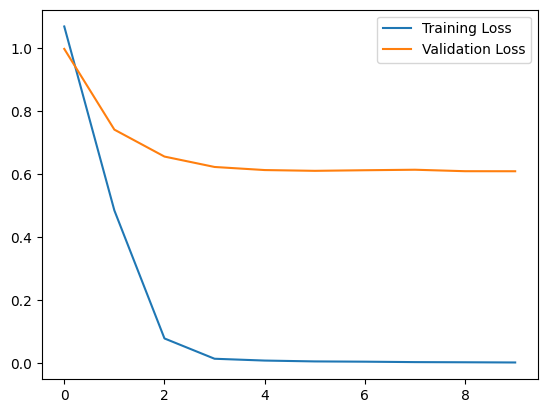

In [107]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix

30/30 [==============================] - 1s 45ms/step


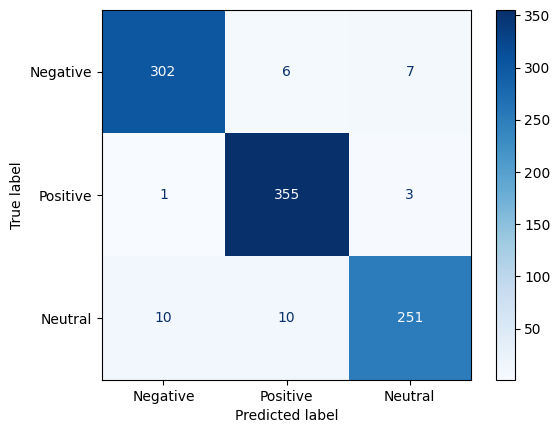

In [98]:
# 1: Vorhersagen generieren
y_pred_prob = seq_model.predict(X_test_dense)
y_pred = np.argmax(y_pred_prob, axis=1)

# 2:True Labels umwandeln (One-Hot kodiert)
y_test_classes = np.argmax(y_test_onehot, axis=1)

# 3: Confusion Matrix generieren
cm = confusion_matrix(y_test_classes, y_pred)

# 4: Visualisierung
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive", "Neutral"])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [83]:
def run_NLP_pipeline(text, tfidf):
    t1 = tokenize(text)
    t2 = lemmatize(t1)
    t3 = remove_things(t2)
    t4, _ = tfidf_vectorize([t3], tfidf = tfidf)
    t5 = t4.toarray()
    return t5

In [130]:
sentence = ["The movie is funny to be honest. The plot is too simple. So bad that it's memorable"]
sentence_1 = run_NLP_pipeline(sentence, fitted_tfidf)
# Check shape to ensure it's correct
print(f"Shape of input for model: {sentence_1.shape}")


Vocabulary size: 100000
Shape of input for model: (1, 100000)


In [131]:
predictions = seq_model.predict(sentence_1)

# Ermitteln der vorhergesagten Klasse (Index der maximalen Wahrscheinlichkeit)
predicted_class = predictions.argmax(axis=-1)

# Zuordnung des Index zur Klasse
class_labels = ["Negative", "Positive", "Neutral"]  # 0, 1 , 2
predicted_label = class_labels[predicted_class[0]]

# Fomarttieren
formatted_predictions = {label: round(prob, 4) for label, prob in zip(class_labels, predictions[0])}
print(f"Probabilities: {formatted_predictions}")

print(f"Predicted Class Index: {predicted_class[0]}")
print(f"Predicted Label: {predicted_label}")

1/1 [==============================] - 0s 35ms/step
Probabilities: {'Negative': 0.4468, 'Positive': 0.2455, 'Neutral': 0.3077}
Predicted Class Index: 0
Predicted Label: Negative


# Ein paar Visualisierungen

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
# Stoppwörter
custom_stopwords = set(STOPWORDS)  # Get default stopwords
custom_stopwords.update(["movie", "film", "scene", "character",
                         "plot", "make", "one", "actor", "see",
                         "watch", "action", "drama"])  # Add domain-specific words
print(custom_stopwords)
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5, stopwords=custom_stopwords)

In [ ]:
#word cloud für positive Wörter
plt.figure(figsize=(10,10))
positive_text=df[df.sentiment == 1].comment
positive_string = ", ".join(positive_text)
positive_words=WC.generate(positive_string)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

In [ ]:
#Word cloud für negative Wörter
plt.figure(figsize=(10,10))
negative_text=df[df.sentiment == 0].comment
negative_string = ", ".join(negative_text)
negative_words=WC.generate(negative_string)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

In [ ]:
#Word cloud für neutrale Wörter
plt.figure(figsize=(10,10))
neutral_text=df[df.sentiment == 2].comment
neutral_string = ", ".join(neutral_text)
neutral_words=WC.generate(neutral_string)
plt.imshow(neutral_words,interpolation='bilinear')
plt.show